## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [3]:
import tensorflow as tf
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/mnist.npz"

In [4]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [5]:
# GRADED FUNCTION: train_mnist_conv
def train_mnist_conv():
    # Please write your code only where you are indicated.
    # please do not remove model fitting inline comments.

    # YOUR CODE STARTS HERE
    class MyCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            if logs.get("acc") > 0.998:
                self.model.stop_training = True
    # YOUR CODE ENDS HERE
    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
    # YOUR CODE STARTS HERE
    
    training_images = training_images.reshape(len(training_images), 28,28,1)
    test_images = test_images.reshape(len(test_images), 28, 28, 1)
    training_images, test_images = training_images/255.0, test_images/255.0
    my_callback = MyCallback()
    # YOUR CODE ENDS HERE

    model = tf.keras.models.Sequential([
            # YOUR CODE STARTS HERE
            tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu, input_shape=(28,28,1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32, (5,5), activation=tf.nn.relu),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation= tf.nn.softmax)         
            # YOUR CODE ENDS HERE
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model fitting
    history = model.fit(
        # YOUR CODE STARTS HERE
        training_images, training_labels, epochs = 20, callbacks=[my_callback]
        # YOUR CODE ENDS HERE
    )
    # model fitting
    return history.epoch, history.history['acc'][-1]



In [6]:
_, _ = train_mnist_conv()

W0505 01:33:51.220692 140510605989696 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/20
60000/60000 [==============================] - 22s 365us/sample - loss: 0.1204 - acc: 0.9632
Epoch 2/20
60000/60000 [==============================] - 18s 303us/sample - loss: 0.0389 - acc: 0.9879
Epoch 3/20
60000/60000 [==============================] - 18s 307us/sample - loss: 0.0271 - acc: 0.9917
Epoch 4/20
60000/60000 [==============================] - 18s 302us/sample - loss: 0.0211 - acc: 0.9935
Epoch 5/20
60000/60000 [==============================] - 18s 300us/sample - loss: 0.0147 - acc: 0.9955
Epoch 6/20
60000/60000 [==============================] - 18s 302us/sample - loss: 0.0110 - acc: 0.9965
Epoch 7/20
60000/60000 [==============================] - 18s 301us/sample - loss: 0.0107 - acc: 0.9965
Epoch 8/20
60000/60000 [==============================] - 18s 302us/sample - loss: 0.0079 - acc: 0.9973
Epoch 9/20
60000/60000 [==============================] - 18s 303us/sample - loss: 0.0078 - acc: 0.9973
Epoch 10/20
60000/60000 [==============================] - 18s 3

In [ ]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [8]:
training_images[0]

NameError: name 'training_images' is not defined

In [14]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
training_images = training_images.reshape(len(training_images), 28,28,1)
training_images = training_images/255.0

In [15]:
training_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

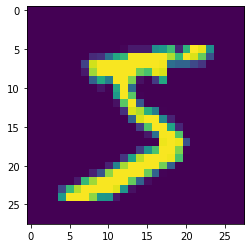

In [16]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0].squeeze())
#plt.axis('off')
plt.show()